<h1><center>Chapter2: End-to-End Machine Learning Project</center></h1>
<h2><center>Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd Edition <br>by Aurélien Géron</center></h2>
<h2><center>example and exercise code</center></h2>

In [1]:
import pandas as pd
import numpy as np

<h2>Reading Data</h2>

In [2]:
housing = pd.read_csv('housing.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


info()
gets data description
total_bedrooms has some missing values.
ocean_proximity is not numeric but object.

In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
# value_counts() shows all values in that attribute and how many values exist for each type of value
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [5]:
# describe() shows total number of values, mean, standard deviation and so forth.
# null values are ignored
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<function matplotlib.pyplot.show(close=None, block=None)>

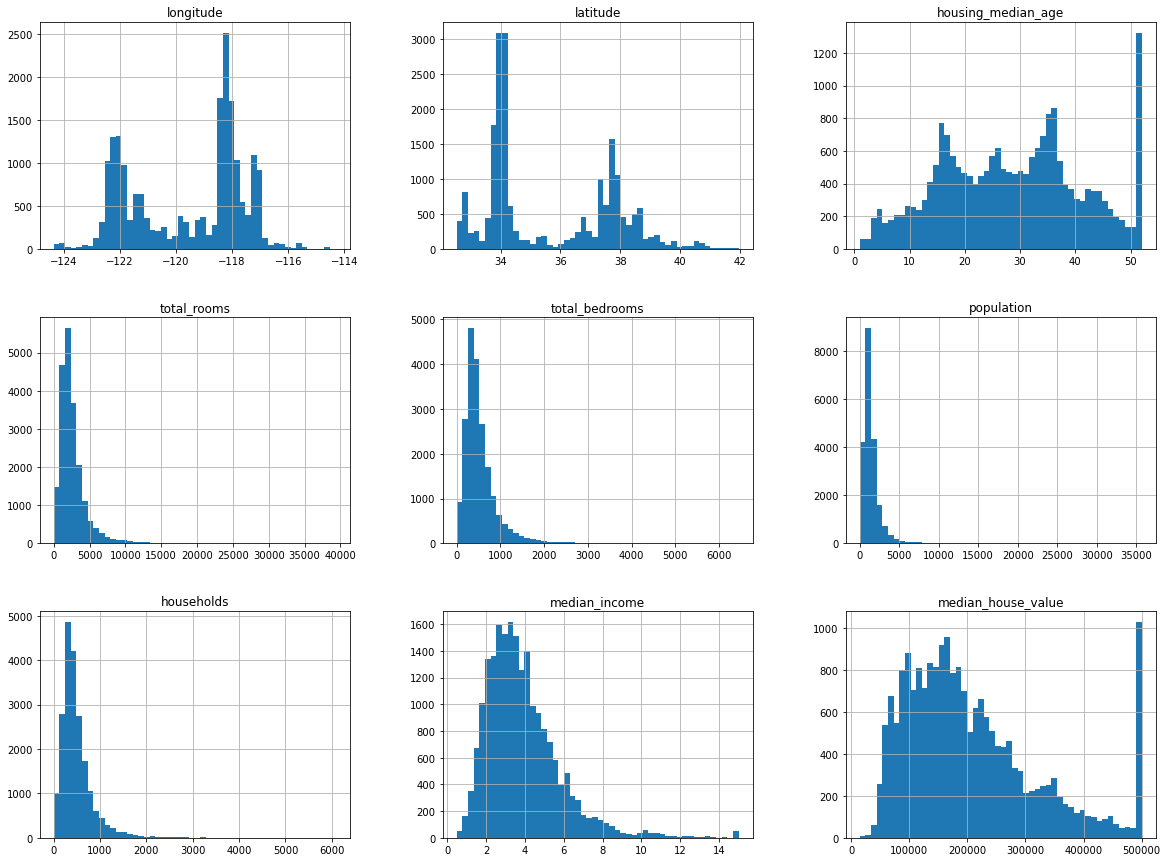

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

housing.hist(bins=50, figsize=(20,15))
plt.show

a few problems:
<ol>
    <li>They have all different scales</li>
    <li>Many histograms are tail-heavy</li>
    <li>Some graphs are capped: housing_median_age and median_house_value</li>
    <li>median_income does not look like it is expressed in USD</li>
</ol>
  
We will need to transform the data.

<h2>Split the dataset into two parts: train set & test set</h2>

In [7]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

randomly sampling data using train_test_split() can be skewed.
For example, the ratio of female and male in America is about 51:49. If I randomly selected samples from a phone book, it would be very likely the samples are biased.
It would be better to do sampling that fits the actual ratio. 

In [8]:
# dividing sections (range=(0, 15), range=(1.5, 3.0) and so on)
housing['income_cat'] = pd.cut(housing['median_income'], 
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5])

<AxesSubplot:>

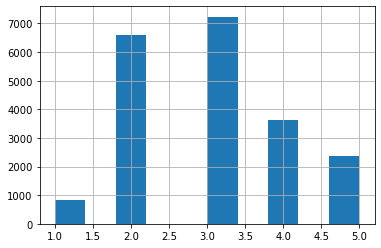

In [9]:
housing['income_cat'].hist()

In [10]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [11]:
strat_test_set['income_cat'].value_counts()/len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [12]:
housing['income_cat'].value_counts()/len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [14]:
test_set['income_cat'] = pd.cut(test_set['median_income'],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5])

<ipython-input-14-2af304f20e23>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set['income_cat'] = pd.cut(test_set['median_income'],


In [16]:
def income_cat_proportion(data):
    proportion = data['income_cat'].value_counts()/len(data)
    return proportion

compare_props = pd.DataFrame({
    "Overall": income_cat_proportion(housing),
    "Stratified": income_cat_proportion(strat_test_set),
    "Random": income_cat_proportion(test_set),
}).sort_index()

compare_props['Rand. %error'] = 100 * compare_props['Random'] / compare_props['Overall'] - 100
compare_props['Stra. %error'] = 100 * compare_props['Stratified'] / compare_props['Overall'] - 100

compare_props

,Overall,Stratified,Random,Rand. %error,Stra. %error
1,0.039826,0.039729,0.040213,0.973236,-0.243309
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114583,0.109496,-4.318374,0.127011


In [17]:
# drop 'income_cat' columns in the sets
for set_ in strat_train_set, strat_test_set:
    set_.drop(columns='income_cat', inplace=True, axis=1)

In [18]:
# make sure your data set only contains training data
# testing dataset is used when the model is optimized and ready to be launched
housing = strat_train_set.copy()

<h2>Visualizing Geographical Data</h2>

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

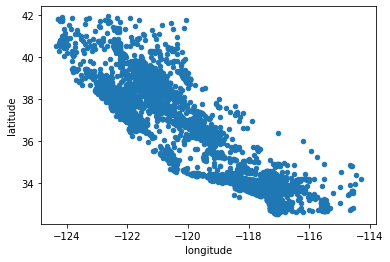

In [19]:
housing.plot(kind='scatter', x='longitude', y='latitude')

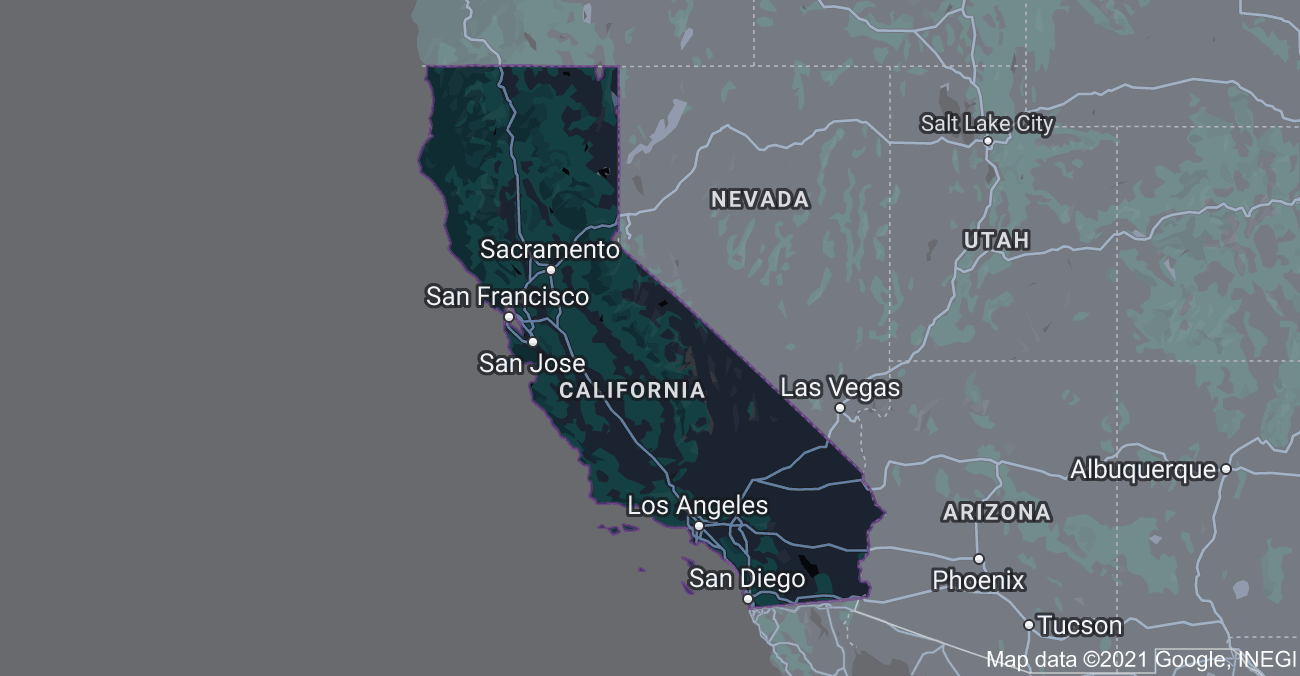

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

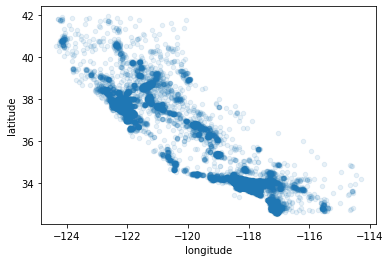

In [20]:
# hard to interpret the graph
# alpha=0.1 makes the density of graph stand out
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)

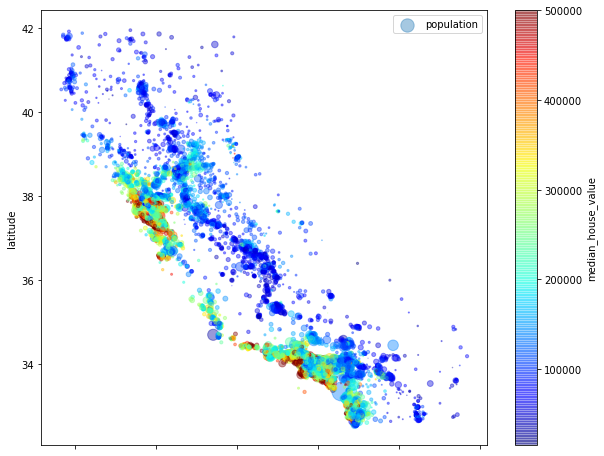

In [21]:
# makes the gragh pattern more obvious and clear
# s=housing['population'] = size of circle
# c='median_hous_value' and cmap = colouring the graph

housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
            s=housing['population']/100, label='population', figsize=(10,8),
             c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True)
plt.x_label='longitude'
plt.y_label='latitude'
plt.legend()

Pattern in the graph:
nearer the beach, higher the median house value except the northen part of the beach.
The house prices tend to get lower in land.

<h2>Looking for Correlations</h2>

In [22]:
corr_matrix = housing.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000


In [23]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

If a correlation value is close to 1, it has a strong positive correlation.
If a value is close to -1, it has a strong negative correlation.
If a value is 0, it means no linear correlation is detected. Keep in mind that no correlation doesn't mean there is no pattern.
It only computes a linear relationship.

<br>
In this dataset, median income has a positive linear relation with median house value.
Meanwhile, latitude has a negative correlation but it is not so obvious.

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

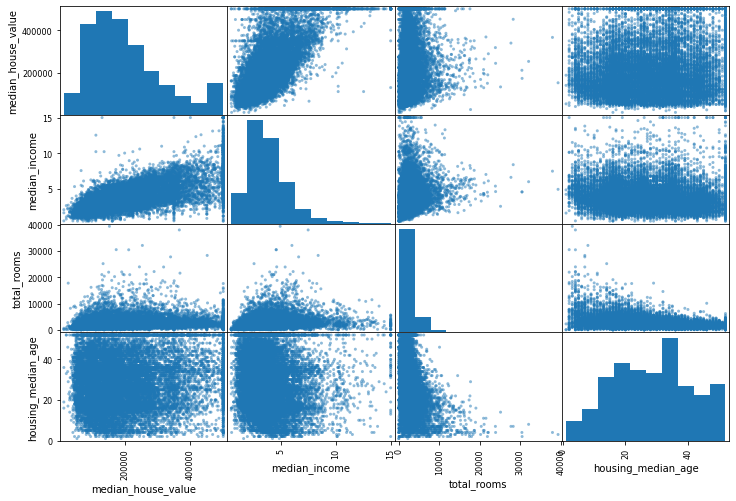

In [24]:
# another way of checking correlations
from pandas.plotting import scatter_matrix

# select a couple of attributes from the above that have relatively strong correlation
attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]

scatter_matrix(housing[attributes], figsize=(12, 8))

Notice that a linear relation is found in median income & median house value graph.
It has a strong upward trend.
However, the graph is capped and some horizontal lines present.
It can lead a machine learning training to go wrong.
It's time to transform the data.

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

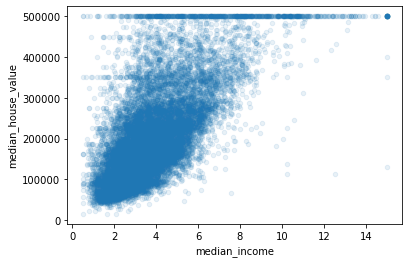

In [25]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)

<h2>Experimenting with Attribute Combinations</h2>

In [83]:
housing['rooms_per_household'] = housing['total_rooms'] / housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms'] / housing['total_rooms']
housing['population_per_household'] = housing['population'] / housing['households']
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN,4.625369,0.223852,2.094395
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN,6.008850,0.159057,2.707965
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN,4.225108,0.241291,2.025974
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND,5.232295,0.200866,4.135977
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN,4.505810,0.231341,3.047847


In [27]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

Compare to the previous correlation matrix, rooms_per_household has a stronger correlation tahn total_rooms.

<h3>Prepare the Data for Machine Learning Algorithms</h3>

In [28]:
# split the data to train and its label (typically named X and y)
housing = strat_train_set.drop('median_house_value', axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

<h3>Data Cleaning</h3>

We saw earlier some values are missing in 'total bedrooms' attribute. Let's fix this. <br>
Solutions:
<ol>
    <li>get rid of the corresponding district</li>
    <li>get rid of the entire attribute</li>
    <li>fill the none values (with zero, the mean, the median, etc.)</li>
</ol>

In [29]:
# using the 3rd method: replace the non values with the median
# Imputer takes care of all the missing values not just one attribute
# !warning! applies to numeric attributes
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

In [30]:
# drop a non-numeric attribute
housing_num = housing.drop('ocean_proximity', axis=1)

In [31]:
# fit the imputer instance to the training data using the fit() method
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [32]:
print('imputer median: {0}, housing_num_median(): {1}'.format(imputer.statistics_, housing_num.median().values))

imputer median: [-118.51     34.26     29.     2119.5     433.     1164.      408.
    3.5409], housing_num_median(): [-118.51     34.26     29.     2119.5     433.     1164.      408.
    3.5409]


In [33]:
# replace the missing values
X = imputer.transform(housing_num)

In [34]:
# the result is a numpy array
# convert it to pandas DataFrame
type(X)

numpy.ndarray

In [35]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

<h3>Handling Text and Categorical Attributes</h3>

Let's go back to the 'ocean_proximity' attribute and learn how to handle non-numeric attributes.

In [36]:
housing_cat = housing[['ocean_proximity']]
housing_cat.head()

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN


<h4>One-Hot Encoder</h4><br>
only one attribute is equal to 1 (hot), while the others are zero (cold).



In [37]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot #sparse matrix

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [38]:
# to dense NumPy array
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

<h3>Custom Transformers</h3>

In [39]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
# rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6
col_names = "total_rooms", 'total_bedrooms', 'population', 'households'
rooms_ix, bedrooms_ix, population_ix, households_ix = [
    housing.columns.get_loc(c) for c in col_names
]

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

CombinedAttributesAdder() has one hyperparameter. 
Why do we set hyperparameters? <br>
Hyperparameters allow you to easily find out whether adding this attribute helps the ML algorithms or not.
It is to find the best combination.

<h3>Feature Scaling</h3>

Generally, ML algorithms don't perform well when the input numerical attributes have very different scales.
<br>
Solutions:
<ol>
    <li>min-max scaling</li>
    <li>standardization</li>
</ol>

<h3>Transformation Pipelines</h3>

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()), # transform method
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

The pipeline constructor takes a list of name/estimator pairs defining a sequence of steps. The above pipeline works for numeric attributes.

In [84]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs)
])

# apply this ColumnTransformer to the housing data
housing_prepared = full_pipeline.fit_transform(housing)
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN,4.625369,0.223852,2.094395
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN,6.008850,0.159057,2.707965
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN,4.225108,0.241291,2.025974
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND,5.232295,0.200866,4.135977
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN,4.505810,0.231341,3.047847


ColumnTransformer handles all columns, both the categorical columns and the numerical columns, by applying the appropriate transformations to each column.

<h2>Select and Train a Model</h2>

<h3>Training and Evaluating on the Training Set</h3>

<h4>Linear Regression Model</h4>

In [42]:
from sklearn.linear_model import LinearRegression

# train the model
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [43]:
some_data = housing.iloc[:5]
some_labels = housing_labels[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions", lin_reg.predict(some_data_prepared))
print("Actual values:", list(some_labels))

Predictions [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]
Actual values: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


How to evaluate the model?
Let's measure this regression model's RMSE on the whole training set.

In [44]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848923

prediction error of $68,628.
This is an example of a model underfitting the traning data.
<br>
Doubts:
How do you check if a model is underfitting or overfitting?

<h4>Decision Tree Regressor</h4>

In [45]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [46]:
from sklearn.metrics import mean_squared_error

housing_predictions = tree_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.0

We've got 0 as the error. Does this mean decision tree regressor is a perfect model?
How can we make sure of that?
We need a better evaluation.

<h3>Better Evaluation Using Cross-Validation</h3>

In [47]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                        scoring='neg_mean_squared_error', cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [48]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [70918.63399772 67370.90396105 71471.63295194 70342.11194712
 73229.80329606 74934.78722331 70192.47527173 71346.35394413
 76355.43640268 69792.30028599]
Mean: 71595.44392817347
Standard deviation: 2482.9930776650676


In [49]:
# linear regression cross validation score
scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                        scoring='neg_mean_squared_error', cv=10)
lin_rmse_scores = np.sqrt(-scores)

display_scores(lin_rmse_scores)

Scores: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean: 69052.46136345083
Standard deviation: 2731.674001798349


In [50]:
# random forest regressor
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)
scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                        scoring='neg_mean_squared_error', cv=10)
forest_rmse_scores = np.sqrt(-scores)
display_scores(forest_rmse_scores)

Scores: [49339.74417959 47623.46567802 49804.81748431 52431.78104999
 49691.87712544 53275.37213286 48649.59600301 48110.74235904
 52954.0828204  50039.14009014]
Mean: 50192.06189228073
Standard deviation: 1913.3911172782243


In [63]:
# Support Vector Regression
from sklearn.svm import SVR

svr = SVR()
svr.fit(housing_prepared, housing_labels)
scores = cross_val_score(svr, housing_prepared, housing_labels, 
                        scoring='neg_mean_squared_error', cv=10)
svr_rmse_scores = np.sqrt(-scores)
display_scores(svr_rmse_scores)

Scores: [111389.0681902  119541.25938571 116957.62830414 120447.19932481
 117618.15904234 122309.10351544 117634.40230741 121469.713921
 120343.01369623 118017.12860651]
Mean: 118572.66762937943
Standard deviation: 2936.8775867949425


<h2>Fine-Tune Your Model</h2>

<h3>Grid Search</h3>

In [51]:
from sklearn.model_selection import GridSearchCV

param_grid = [
     {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                          scoring='neg_mean_squared_error',
                          return_train_score=True)

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [52]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [53]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

64969.73371416651 {'max_features': 2, 'n_estimators': 3}
55864.77515251983 {'max_features': 2, 'n_estimators': 10}
52663.7443592119 {'max_features': 2, 'n_estimators': 30}
60776.962866201764 {'max_features': 4, 'n_estimators': 3}
52851.87942249515 {'max_features': 4, 'n_estimators': 10}
50264.07659785303 {'max_features': 4, 'n_estimators': 30}
59127.8236680545 {'max_features': 6, 'n_estimators': 3}
52524.26264086685 {'max_features': 6, 'n_estimators': 10}
49800.66029558109 {'max_features': 6, 'n_estimators': 30}
58964.873551208555 {'max_features': 8, 'n_estimators': 3}
51758.32938254907 {'max_features': 8, 'n_estimators': 10}
50252.325185619346 {'max_features': 8, 'n_estimators': 30}
62266.20333355437 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54338.82744469063 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59130.28570837322 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52374.76179119615 {'bootstrap': False, 'max_features': 3, 'n_estimators': 1

In [69]:
# Support Vector Machine Regressor
param_grid = [{
     'kernel': ['linear', 'rbf','poly'], 
    'C':[1.5, 10],
    'gamma': [1e-7, 1e-4],
    'epsilon':[0.1,0.2,0.5,0.3]
}]

svr = SVR()
svr_grid_search = GridSearchCV(svr, param_grid, cv=5,
                          scoring='neg_mean_squared_error',
                          return_train_score=True)

svr_grid_search.fit(housing_prepared, housing_labels)

KeyboardInterrupt: 

<h3>Randomized Search</h3>

In [57]:
# Random Forest Regressor

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
    'n_estimators': randint(low=1, high=200),
    'max_features': randint(low=1, high=8),
}

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                               n_iter=10, cv=5, scoring='neg_mean_squared_error')
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001FBE1BF1640>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001FBE2316EB0>},
                   scoring='neg_mean_squared_error')

In [59]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

49675.742765674855 {'max_features': 5, 'n_estimators': 87}
50542.151176882966 {'max_features': 3, 'n_estimators': 129}
51371.53574472148 {'max_features': 4, 'n_estimators': 17}
49318.61699326455 {'max_features': 6, 'n_estimators': 125}
49508.839799463574 {'max_features': 5, 'n_estimators': 129}
49651.84751357444 {'max_features': 4, 'n_estimators': 182}
49294.97158211416 {'max_features': 7, 'n_estimators': 113}
52060.72958751619 {'max_features': 2, 'n_estimators': 122}
52925.834659776694 {'max_features': 5, 'n_estimators': 9}
49306.02222572805 {'max_features': 6, 'n_estimators': 120}


<h3>Analyze the Best Models and Their Errors</h3>

In [87]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.78396469e-02, 6.86294633e-02, 4.07283834e-02, 1.75900178e-02,
       1.67250675e-02, 1.75299292e-02, 1.54918643e-02, 3.06055833e-01,
       5.05298603e-02, 1.10601837e-01, 8.84091159e-02, 1.36478012e-02,
       1.67048747e-01, 1.20121514e-04, 3.79348374e-03, 5.25882860e-03])

In [88]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_['cat']
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.3060558326952577, 'median_income'),
 (0.16704874691867933, 'INLAND'),
 (0.11060183673535738, 'pop_per_hhold'),
 (0.0884091158731159, 'bedrooms_per_room'),
 (0.07783964693847803, 'longitude'),
 (0.06862946332773756, 'latitude'),
 (0.05052986030741764, 'rooms_per_hhold'),
 (0.04072838340210553, 'housing_median_age'),
 (0.017590017825493964, 'total_rooms'),
 (0.017529929187107943, 'population'),
 (0.016725067488535958, 'total_bedrooms'),
 (0.015491864257597058, 'households'),
 (0.013647801190268401, '<1H OCEAN'),
 (0.0052588285951893675, 'NEAR OCEAN'),
 (0.003793483743707664, 'NEAR BAY'),
 (0.00012012151395056806, 'ISLAND')]

<h3>Evaluate Your System on the Test Set</h3>

In [66]:
final_model = rnd_search.best_estimator_

X_test = strat_test_set.drop('median_house_value', axis=1)
y_test = strat_test_set['median_house_value'].copy()

# call transform(), not fit_transform()
# you do not want to fit(train) the test set
X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

final_rmse

46951.26921635633

In [89]:
from sklearn.base import BaseEstimator, TransformerMixin

def indices_of_top_k(arr, k):
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])

class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_imortances, k):
        self.feature_importances = feature_importances
        self.k = k
    def fit(self, X, y=None):
        self.feature_indices_ = indices_of_top_k(self.feature_importances, self.k)
        return self
    def transform(self, X):
        return X[:, self.feature_indices_]

In [71]:
k = 5
top_k_feature_indices = indices_of_top_k(feature_importances, k)
top_k_feature_indices

array([ 0,  7,  9, 10, 12], dtype=int64)

In [72]:
np.array(attributes)[top_k_feature_indices]

array(['longitude', 'median_income', 'pop_per_hhold', 'bedrooms_per_room',
       'INLAND'], dtype='<U18')

In [73]:
sorted(zip(feature_importances, attributes), reverse=True)[:k]

[(0.3060558326952577, 'median_income'),
 (0.16704874691867933, 'INLAND'),
 (0.11060183673535738, 'pop_per_hhold'),
 (0.0884091158731159, 'bedrooms_per_room'),
 (0.07783964693847803, 'longitude')]

In [90]:
preparation_and_feature_selection_pipeline = Pipeline({
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k))
})

In [91]:
#housing.head()
k = 5

housing_prepared_top_k_features = preparation_and_feature_selection_pipeline.fit_transform(housing)

In [92]:
housing_prepared_top_k_features[0:3]

array([[-1.15604281, -0.61493744, -0.08649871,  0.15531753,  0.        ],
       [-1.17602483,  1.33645936, -0.03353391, -0.83628902,  0.        ],
       [ 1.18684903, -0.5320456 , -0.09240499,  0.4222004 ,  0.        ]])

In [93]:
housing_prepared[0:3, top_k_feature_indices]

array([[-1.15604281, -0.61493744, -0.08649871,  0.15531753,  0.        ],
       [-1.17602483,  1.33645936, -0.03353391, -0.83628902,  0.        ],
       [ 1.18684903, -0.5320456 , -0.09240499,  0.4222004 ,  0.        ]])

In [97]:
prepare_select_and_predict_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k)),
    ('rnd_forest_reg', RandomForestRegressor(**rnd_search.best_params_))
])

In [98]:
prepare_select_and_predict_pipeline.fit(housing, housing_labels)

ValueError: max_features must be in (0, n_features]